In [1]:
## 📥 1. Import Libraries & Load Dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]   # Use 2 features for visualization
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
## ⚙️ 2. Train Linear SVM Model

In [5]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

print("Linear SVM Accuracy:", round(acc_linear, 3))

Linear SVM Accuracy: 0.733


In [10]:
## 📈 Linear SVM Decision Boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=40)
    plt.title(title)
    plt.show()

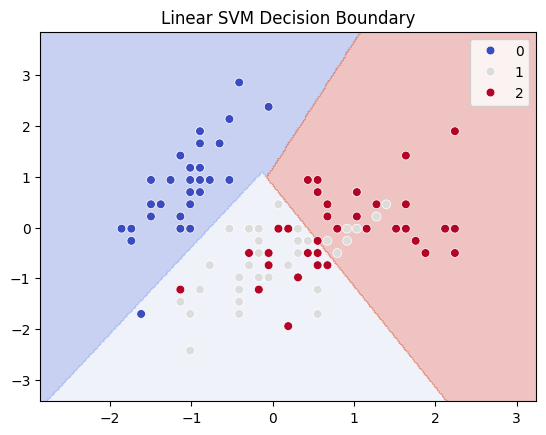

In [11]:
plot_decision_boundary(linear_svm, X_train, y_train, "Linear SVM Decision Boundary")

In [12]:
## ⚙️ 3. Train Kernel SVM (RBF)

In [13]:
rbf_svm = SVC(kernel='rbf', gamma=0.5)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("RBF Kernel SVM Accuracy:", round(acc_rbf, 3))


RBF Kernel SVM Accuracy: 0.733


In [14]:
## 📈 RBF SVM Decision Boundary

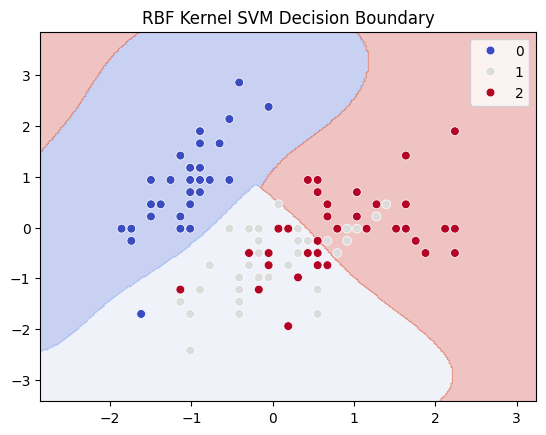

In [15]:
plot_decision_boundary(rbf_svm, X_train, y_train, "RBF Kernel SVM Decision Boundary")

In [16]:
## 📊 Confusion Matrix (RBF SVM)

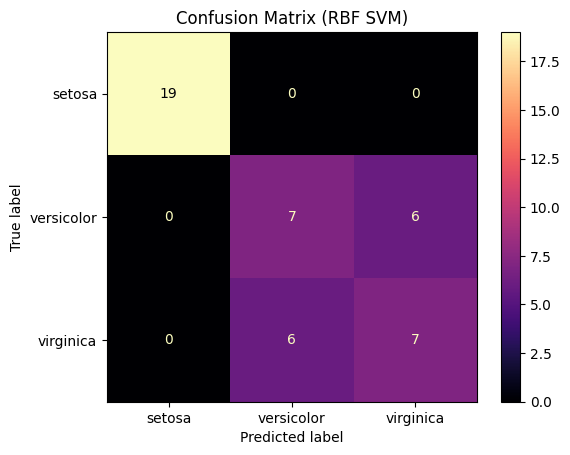

In [17]:
cm = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='magma')
plt.title("Confusion Matrix (RBF SVM)")
plt.show()